# 作業二：請針對所提供的資料檔案(boston_house(type),xlsx)進行以下分析：
1. 請畫出此資料中房價的直方圖。
2. 請畫出此資料中房價超過20(PRICE TYPE=2)與低於20(PRICE TYPE=1)的個數的長條圖。
3. 請畫出此資料中RAD各類別個數的圓餅圖。
4. 請畫出此資料中量化指標相關性的配對圖。
5. 請畫出此資料中量化指標相關性的熱圖。
請說明上述視覺化圖形分析結果

備註：資料取自於Kaggle平台


In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#設定繪圖桌布大小
plt.rcParams['figure.figsize']=(15,8)

In [ ]:
from google.colab import files
data=pd.read_excel('boston_house(type).xlsx')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


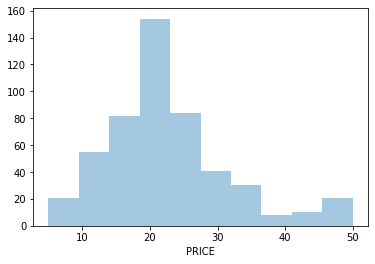

In [ ]:
#第一題
sns.distplot(data['PRICE'].dropna(),bins=10,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


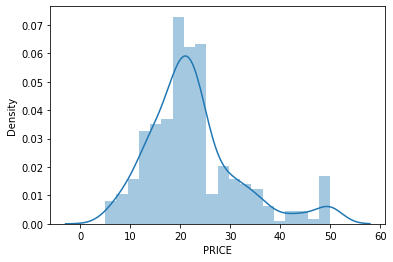

In [ ]:
#第一題
sns.distplot(data['PRICE'].dropna(),bins=20,kde=True)

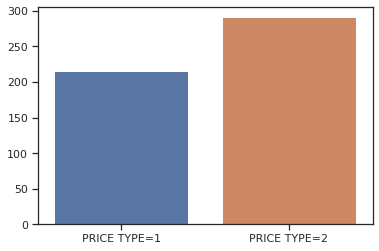

In [ ]:
#第二題 個數的長條圖
import seaborn as sns
sns.set(style='ticks')
result=[sum(data['PRICE TYPE']==1),sum(data['PRICE TYPE']==2)]
sns.barplot(x=['PRICE TYPE=1','PRICE TYPE=2'],y=result)

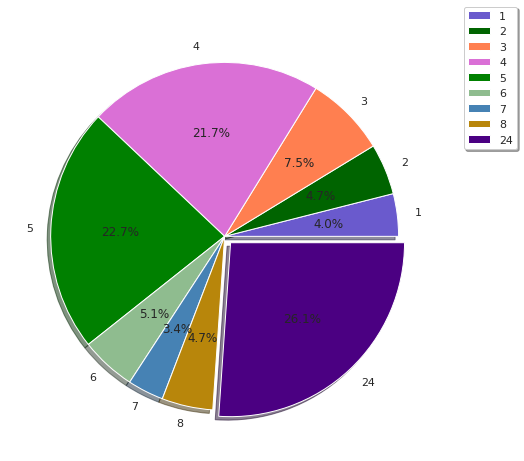

In [ ]:
#第三題
import numpy as np
from random import sample
import matplotlib.colors as pltc #Matplotlib可以識別格式來判斷顏色
all_colors = [k for k,v in pltc.cnames.items()] #可以讓圓餅圖中的數據隨機配色，不用一個一個上色
f=data.groupby('RAD')    #利用上次作業的groupby計算數量做成圓餅圖
frequence=f.size()
percentage=(f.size()/len(data))*100
flist=pd.DataFrame(frequence,columns=["COUNT"])
#flist["PERCENTAGE%"]=pd.DataFrame(percentage,columns=["PERCENTAGE"]) #將計算好的百分比加入到新的data frame裡面
#print(flist.round(1))
labels = ["1","2","3","4","5","6","7","8","24"]
explode = ((flist["COUNT"] == max(flist["COUNT"])).astype(int) / 20).tolist() #將"percentage"最多的數值在圓餅圖中特別展示出來
colors = sample(all_colors,len(flist["COUNT"])) 
plt.figure(figsize=(8,8))
plt.pie(flist["COUNT"], labels=labels, autopct='%1.1f%%',shadow=True, explode=explode, colors=colors)#製作成圓餅圖，並且加上陰影，怕隨機顏色會接近白色而看不清楚
plt.legend(labels, loc=(1.05, 0.7), shadow=True)
plt.show()


In [ ]:
data.info()#確認數據型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
 15  PRICE TYPE  506 non-null    int64  
dtypes: float64(11), int64(5)
memory usage: 63.4 KB


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd64f01fdd0> (for post_execute):


KeyboardInterrupt: ignored

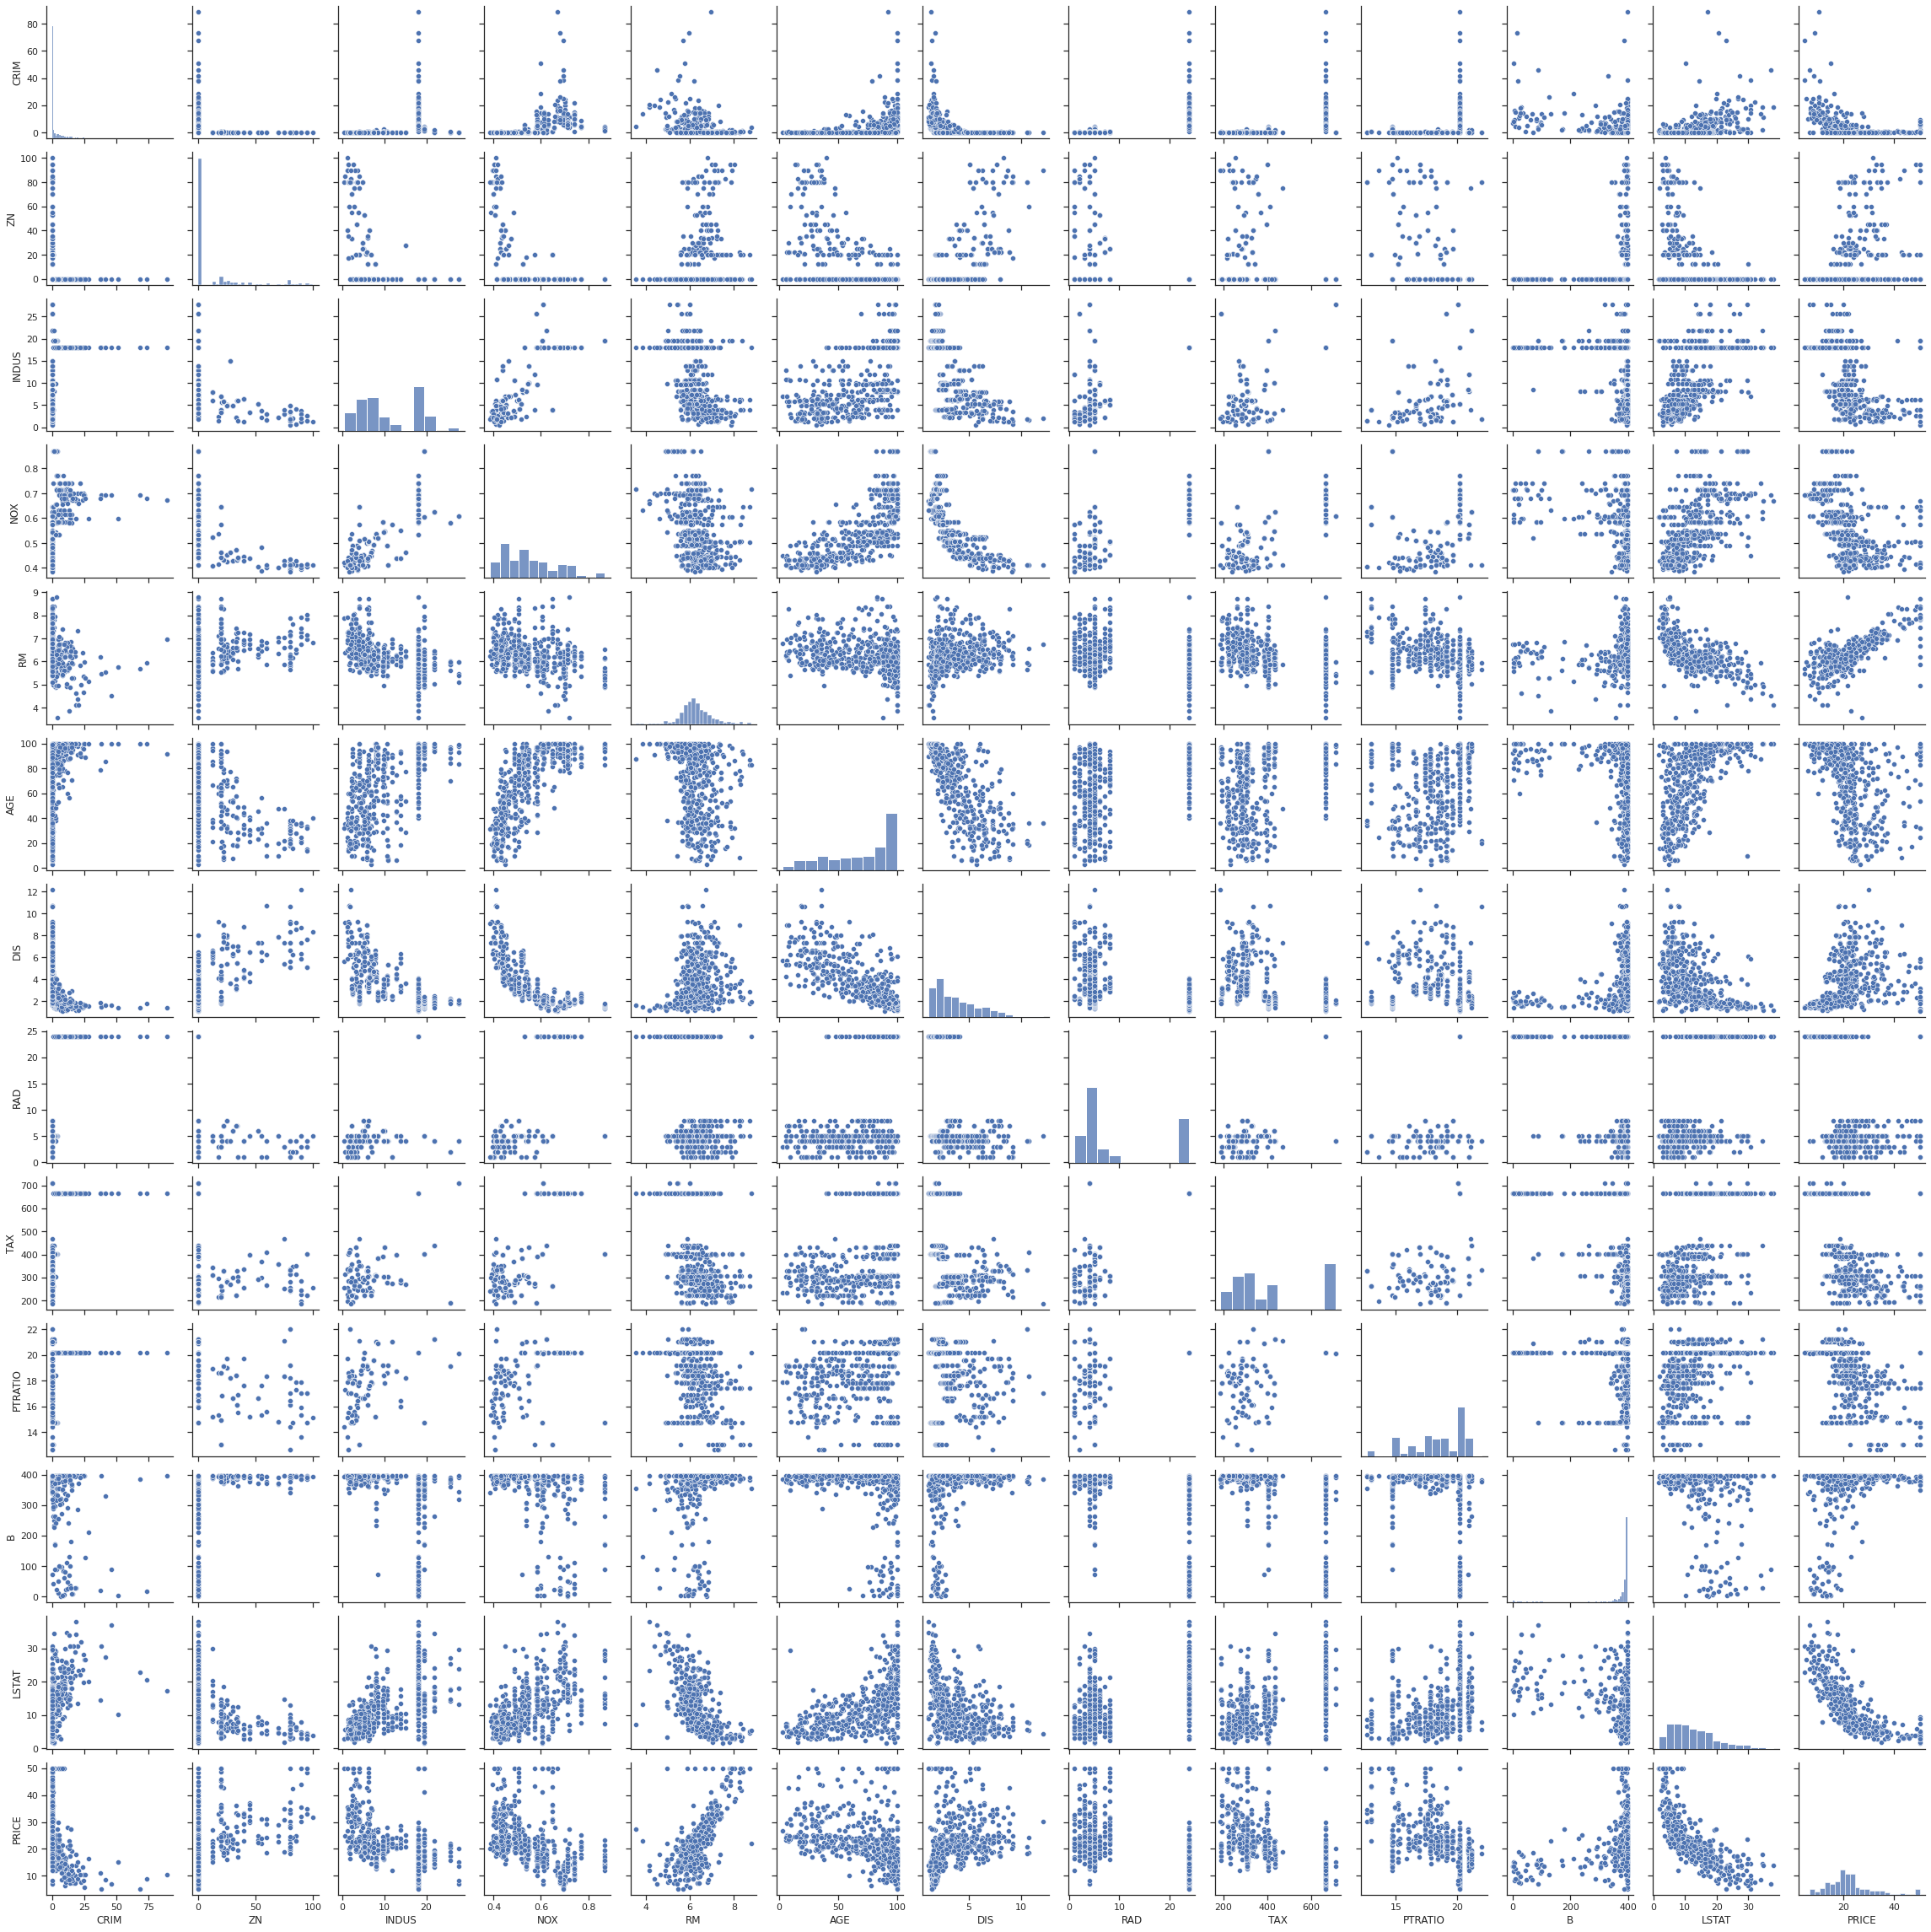

In [ ]:
#第四題
#做數值量化的配對圖
sns.set(style='ticks')
sns.pairplot(data.iloc[:,1:].drop(columns=['CHAS','PRICE TYPE']))

In [ ]:
#第五題
#以相關分析數據量化所做成的熱圖
sns.heatmap(data.iloc[:,1:].drop(columns=['CHAS','PRICE TYPE']).corr(),annot=False,cmap='plasma')